## Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve their services so that customers do not renounce their credit cards

## Objective

* Explore and visualize the dataset.
* Build a classification model to predict if the customer is going to churn or not
* Optimize the model using appropriate techniques
* Generate a set of insights and recommendations that will help the bank

## Data Dictionary:

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

### Index

- <a href = #link1>Overview of the dataset</a>


- <a href = #link2>EDA</a> 


- <a href = #link3>Split the dataset/Data Pre-processing</a>


- <a href = #link4>Model building - Logistic Regression, Bagging, RandomForest, GradientBoosting, AdaBoost, Xgboost, Decision_tree</a> 


- <a href = #link5>Hyperparameter tuning using grid search</a>


- <a href = #link6>Hyperparameter tuning using random search</a>


- <a href = #link7>Model Performances</a>


- <a href = #link8>Business Recommendations/Actionable Insights</a>

## <a id = "link1"></a> Overview of the dataset 

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import math

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

# To impute missing values/data preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# building a Pipelinr
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier)
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import OneHotEncoder 
# To suppress the warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("BankChurners.csv")

In [3]:
data.head(25)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0   768805383  Existing Customer            45      M                3   
1   818770008  Existing Customer            49      F                5   
2   713982108  Existing Customer            51      M                3   
3   769911858  Existing Customer            40      F                4   
4   709106358  Existing Customer            40      M                3   
5   713061558  Existing Customer            44      M                2   
6   810347208  Existing Customer            51      M                4   
7   818906208  Existing Customer            32      M                0   
8   710930508  Existing Customer            37      M                3   
9   719661558  Existing Customer            48      M                2   
10  708790833  Existing Customer            42      M                5   
11  710821833  Existing Customer            65      M                1   
12  710599683  Existing Customer            56      M                1   
13  816082233  Existing Customer            35      M                3   
14  712396908  Existing Customer            57      F                2   
15  714885258  Existing Customer            44      M                4   
16  709967358  Existing Customer            48      M                4   
17  753327333  Existing Customer            41      M                3   
18  806160108  Existing Customer            61      M                1   
19  709327383  Existing Customer            45      F                2   
20  806165208  Existing Customer            47      M                1   
21  708508758  Attrited Customer            62      F                0   
22  784725333  Existing Customer            41      M                3   
23  811604133  Existing Customer            47      F                4   
24  789124683  Existing Customer            54      M                2   

   Education_Level Marital_Status Income_Category Card_Category  \
0      High School        Married     $60K - $80K          Blue   
1         Graduate         Single  Less than $40K          Blue   
2         Graduate        Married    $80K - $120K          Blue   
3      High School        Unknown  Less than $40K          Blue   
4       Uneducated        Married     $60K - $80K          Blue   
5         Graduate        Married     $40K - $60K          Blue   
6          Unknown        Married         $120K +          Gold   
7      High School        Unknown     $60K - $80K        Silver   
8       Uneducated         Single     $60K - $80K          Blue   
9         Graduate         Single    $80K - $120K          Blue   
10      Uneducated        Unknown         $120K +          Blue   
11         Unknown        Married     $40K - $60K          Blue   
12         College         Single    $80K - $120K          Blue   
13        Graduate        Unknown     $60K - $80K          Blue   
14        Graduate        Married  Less than $40K          Blue   
15         Unknown        Unknown    $80K - $120K          Blue   
16   Post-Graduate         Single    $80K - $120K          Blue   
17         Unknown        Married    $80K - $120K          Blue   
18     High School        Married     $40K - $60K          Blue   
19        Graduate        Married         Unknown          Blue   
20       Doctorate       Divorced     $60K - $80K          Blue   
21        Graduate        Married  Less than $40K          Blue   
22     High School        Married     $40K - $60K          Blue   
23         Unknown         Single  Less than $40K          Blue   
24         Unknown        Married    $80K - $120K          Blue   

    Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0               39  ...                       1                      3   
1               44  ...                       1                      2   
2               36  ...                       1                      0   
3               34  ...                 

In [4]:
data.shape

(10127, 21)

**Observations-**
* There are 10,127 observations and 21 columns in the dataset

**Checking data types and number of non-null values for each column.**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

**Observations-**
* All features are not numeric type but objects.
* There are not a lot of missing values in the data but i did notice a few zeros for in the head df.
* dtypes: float64(5), int64(10), object(6)

In [6]:
data.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [7]:
data[data.duplicated()].count()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

**Observations-**
* looks like no NaN or Null values
* Looks like no duplicated data

**Number of unique values in each column**

In [8]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

**Observations-**
* CLIENTNUM at 10127 and Avg_Open_To_Buy at 6813 have the highest number of unique values in each column.

**Summary of the dataset**

In [9]:
data.describe().T

count          mean           std          min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  708082083.0   
Customer_Age              10127.0  4.632596e+01  8.016814e+00         26.0   
Dependent_count           10127.0  2.346203e+00  1.298908e+00          0.0   
Months_on_book            10127.0  3.592841e+01  7.986416e+00         13.0   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00          1.0   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00          0.0   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00          0.0   
Credit_Limit              10127.0  8.631954e+03  9.088777e+03       1438.3   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02          0.0   
Avg_Open_To_Buy           10127.0  7.469140e+03  9.090685e+03          3.0   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01          0.0   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03        510.0   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01         10.0   
Total_Ct_Chng_Q4_Q1       10127.0  7.122224e-01  2.380861e-01          0.0   
Avg_Utilization_Ratio     10127.0  2.748936e-01  2.756915e-01          0.0   

                                   25%           50%           75%  \
CLIENTNUM                 7.130368e+08  7.179264e+08  7.731435e+08   
Customer_Age              4.100000e+01  4.600000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.100000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.555000e+03  4.549000e+03  1.106750e+04   
Total_Revolving_Bal       3.590000e+02  1.276000e+03  1.784000e+03   
Avg_Open_To_Buy           1.324500e+03  3.474000e+03  9.859000e+03   
Total_Amt_Chng_Q4_Q1      6.310000e-01  7.360000e-01  8.590000e-01   
Total_Trans_Amt           2.155500e+03  3.899000e+03  4.741000e+03   
Total_Trans_Ct            4.500000e+01  6.700000e+01  8.100000e+01   
Total_Ct_Chng_Q4_Q1       5.820000e-01  7.020000e-01  8.180000e-01   
Avg_Utilization_Ratio     2.300000e-02  1.760000e-01  5.030000e-01   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              7.300000e+01  
Dependent_count           5.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.451600e+04  
Total_Revolving_Bal       2.517000e+03  
Avg_Open_To_Buy           3.451600e+04  
Total_Amt_Chng_Q4_Q1      3.397000e+00  
Total_Trans_Amt           1.848400e+04  
Total_Trans_Ct            1.390000e+02  
Total_Ct_Chng_Q4_Q1       3.714000e+00  
Avg_Utilization_Ratio     9.990000e-01

**Observations-**
* CLIENTNUM seems like we will not have a use for this colume and should be dropped
* Customer_Age	starts at 27 years old to 73 years old
* Credit_Limit starts at 1438.3 and ends at 34,516 on the high end
* Total_Trans_Amt	stars at 510 and ends with 18,484 omn the high end
* the strange thing about this data is that it only goes back one year and that could make it hard to make good prodictions because that is  not enough data especially if it was a covid year.

**Number of observations in each category**

In [10]:
cat_cols=['Attrition_Flag',     
            'Customer_Age',                
            'Gender',                      
            'Dependent_count',             
            'Education_Level',            
            'Marital_Status',             
            'Income_Category',             
            'Card_Category',               
            'Months_on_book',              
            'Total_Relationship_Count',   
            'Months_Inactive_12_mon',      
            'Contacts_Count_12_mon',       
            'Credit_Limit',                
            'Total_Revolving_Bal',        
            'Avg_Open_To_Buy',             
            'Total_Amt_Chng_Q4_Q1',        
            'Total_Trans_Amt',            
            'Total_Trans_Ct',              
            'Total_Ct_Chng_Q4_Q1',         
            'Avg_Utilization_Ratio']

for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)    

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
------------------------------
44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
60    127
33    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
73      1
70      1
Name: Customer_Age, dtype: int64
------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
------------------------------
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Edu

**Observations-**
* thier are 2463 accouts that have been on the books for 36 months
* Thier are 508 people that have credit limit at 34,516
* thier are 2470 people that have a revolving balance of 0
* Thier are 1487 people that are account holders that are uneducatied
* Thier is a good balance between Men and women in this dataset

## <a id = "link2"></a> EDA

In [11]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create a boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this helps us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

**Uni-variate analysis of numerical variables**

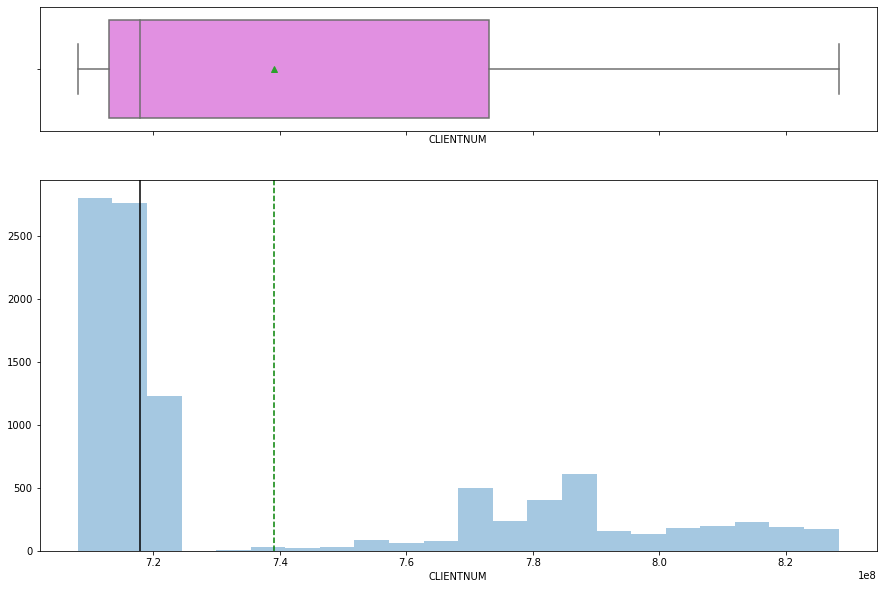

In [12]:
histogram_boxplot(data["CLIENTNUM"])

* The CLIENTNUM is a Unique identifier for the customer holding the account but why do it not symmetric and full of gaps ?

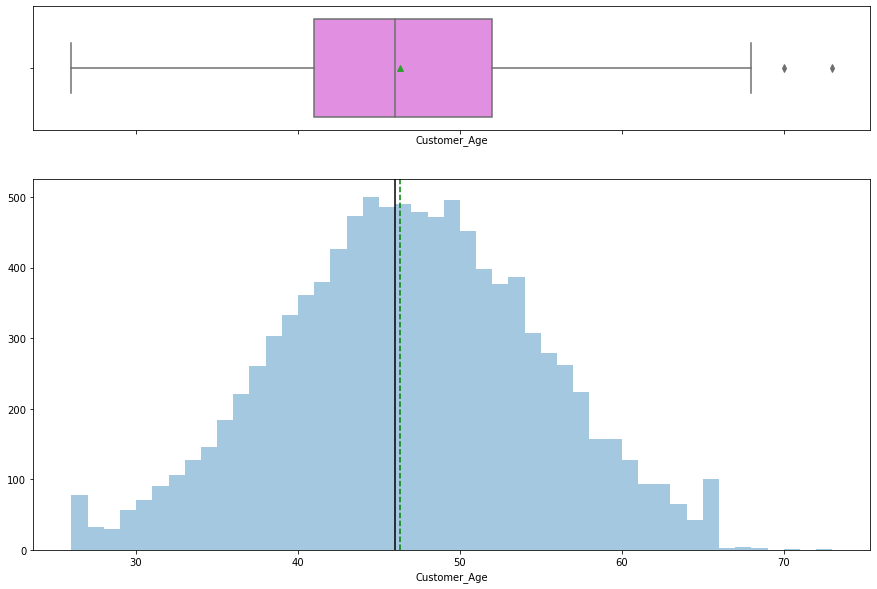

In [13]:
histogram_boxplot(data["Customer_Age"])

* The distribution is nearly symmetric with few outliers to the right.
* The mean and median values are almost the same
* The mean and median are at 46 for age

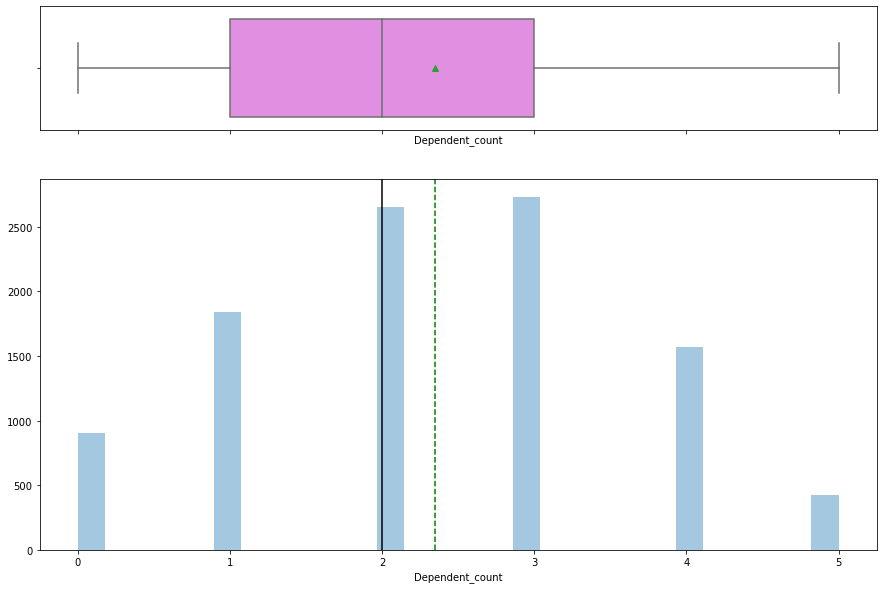

In [14]:
histogram_boxplot(data["Dependent_count"])

* The distribution is nearly symmetric with no outliers to the right or left.
* The mean and median values are pretty close


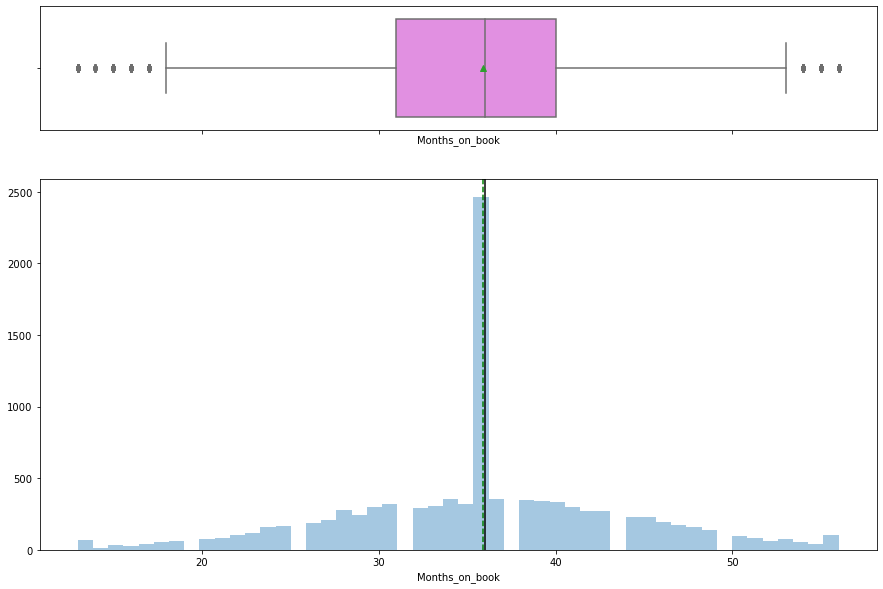

In [15]:
histogram_boxplot(data["Months_on_book"])

* The distribution is nearly symmetric with few outliers to the right and left if it wasnt for the high 36 month count.
* The mean and median values are almost the same
* The mean and median are at 36 month on the books 

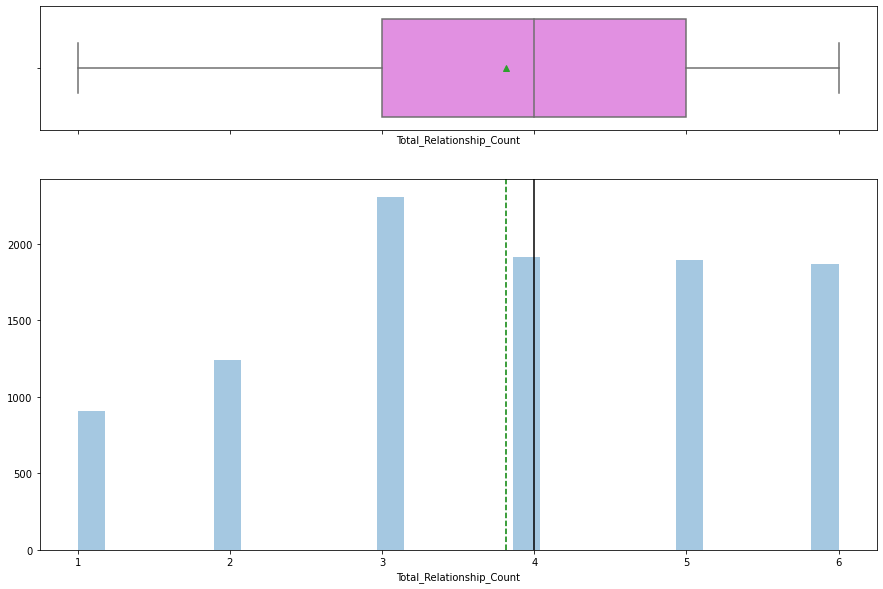

In [16]:
histogram_boxplot(data["Total_Relationship_Count"])

* The distribution is nearly symmetric with no outliers to the right or left.
* The mean and median values are almost the same
* Just a little skew to the right

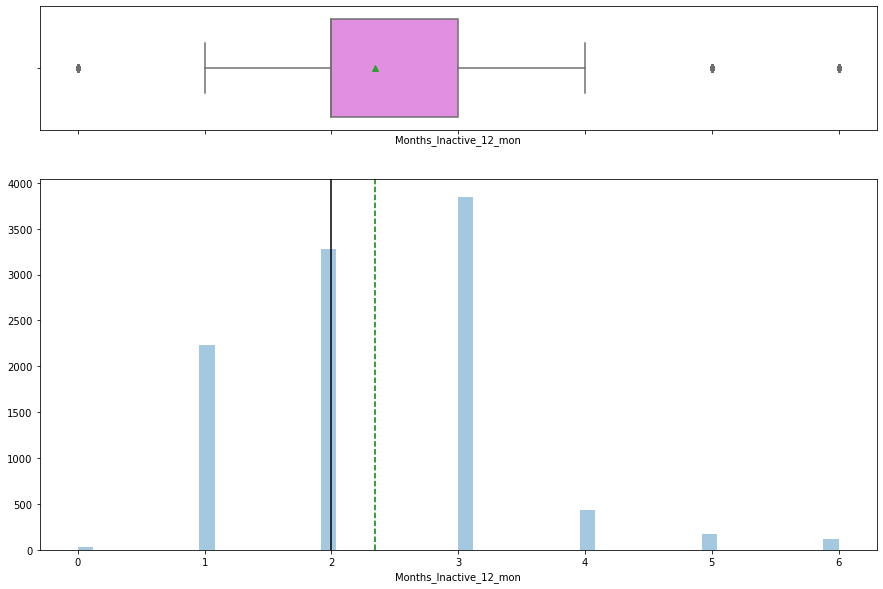

In [17]:
histogram_boxplot(data["Months_Inactive_12_mon"])

* The distribution is nearly symmetric with few outliers to the right or left.
* The mean and median values are almost the same
* The mean and median are at 2.3 for Months inactive

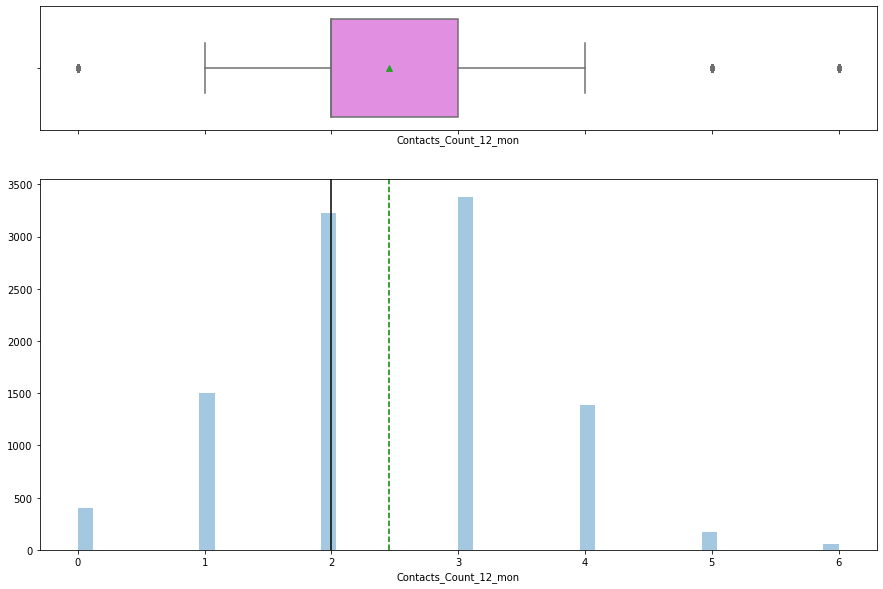

In [18]:
histogram_boxplot(data["Contacts_Count_12_mon"])

* The distribution is nearly symmetric with few outliers to the right or left.
* The mean and median values are almost the same
* The mean and median are at 2 to 2.5 for contacts count 

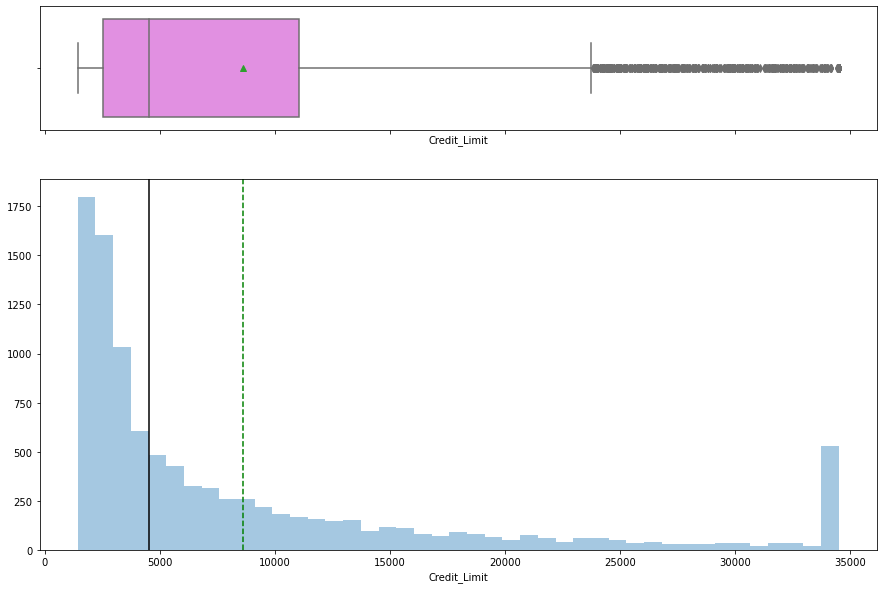

In [19]:
histogram_boxplot(data["Credit_Limit"])

* The distribution is not symmetric with alot of outliers to the right.
* The mean and median values are far apart
* The data seems skewed to the left for this colume

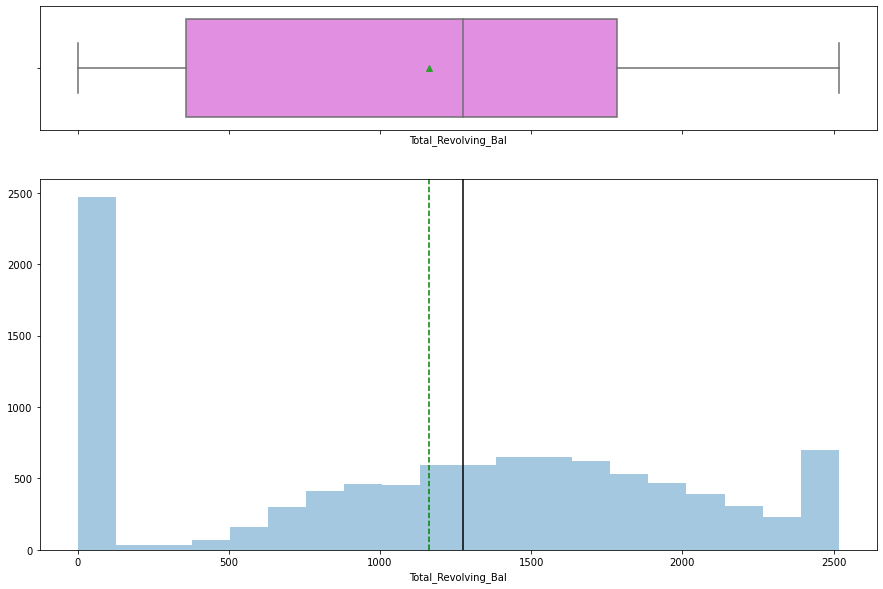

In [20]:
histogram_boxplot(data["Total_Revolving_Bal"])

* The distribution is nearly symmetric with no outliers to the right or left if we dont count the 0 total rovolving bal.
* The mean and median values are very close togather
* The mean and median are at 1100 to 1300 

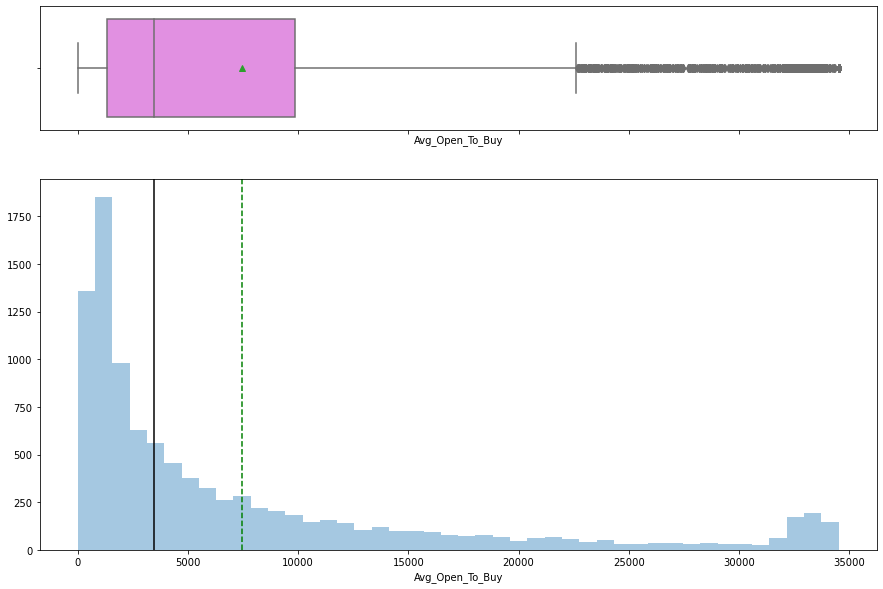

In [21]:
histogram_boxplot(data["Avg_Open_To_Buy"])

* The distribution is not symmetric with alot of outliers to the right.
* The mean and median values are far apart
* The data seems skewed to the left for this colume

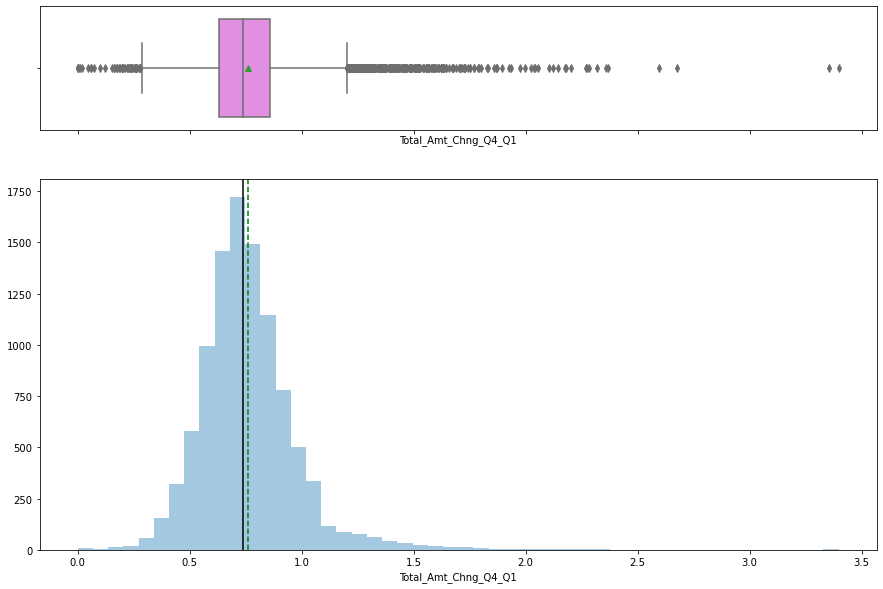

In [22]:
histogram_boxplot(data["Total_Amt_Chng_Q4_Q1"])

* The distribution is symmetric with alot of outliers to the right and left.
* The mean and median values are close togather
* The data seems skewed to the left for this colume

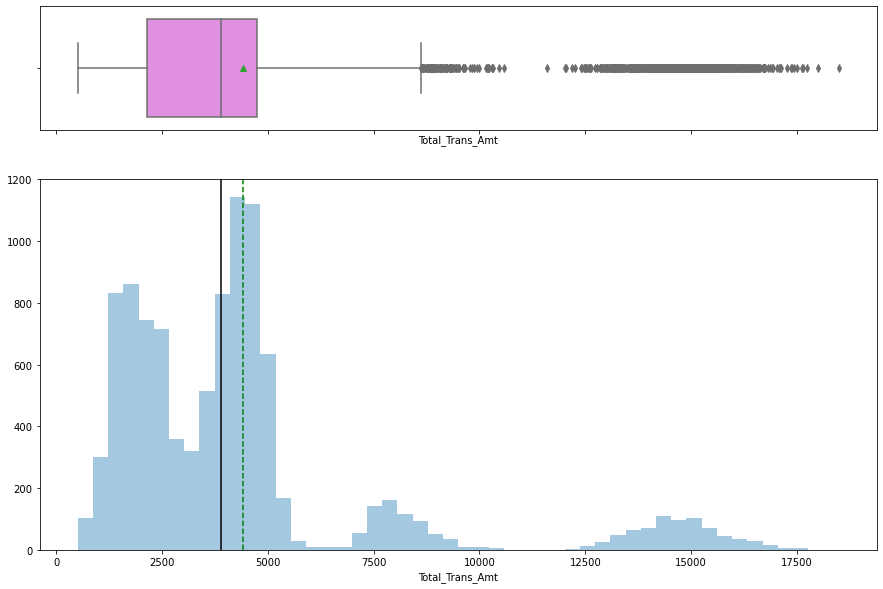

In [23]:
histogram_boxplot(data["Total_Trans_Amt"])

* The distribution is not symmetric with alot of outliers to the right.
* The mean and median values are alittle apart
* The data seems skewed to the left for this colume

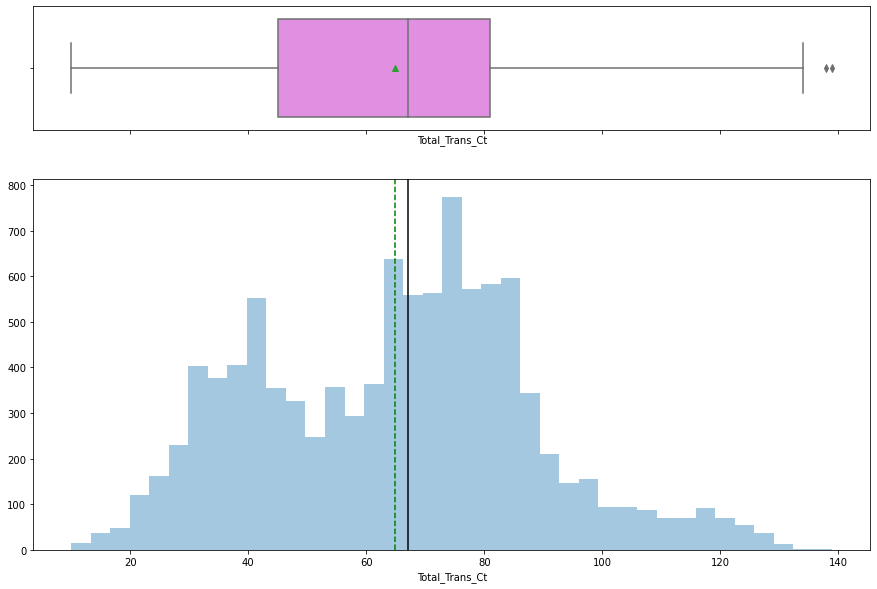

In [24]:
histogram_boxplot(data["Total_Trans_Ct"])

* The distribution is not symmetric with a few of outliers to the right.
* The mean and median values are close togather
* The data seems skewed a hair to the left for this colume

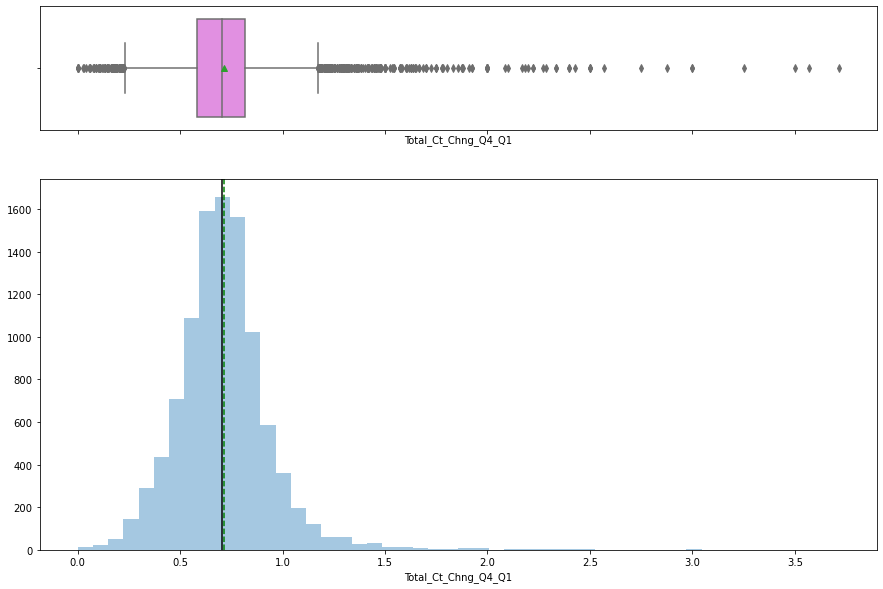

In [25]:
histogram_boxplot(data["Total_Ct_Chng_Q4_Q1"])

* The distribution is  symmetric with alot of outliers to the right and left.
* The mean and median values vary close togather
* The data seems skewed to the left for this colume

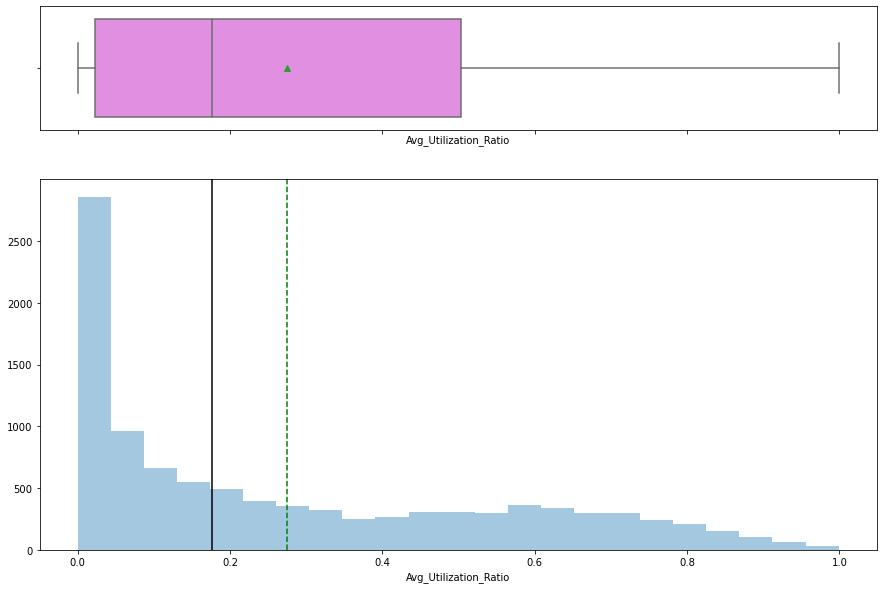

In [26]:
histogram_boxplot(data["Avg_Utilization_Ratio"])

* The distribution is not symmetric with no outliers to the right.
* The mean and median values are close togather
* The data seems skewed to the left for this colume

**Uni-variate analysis of categorical features**

In [27]:
def perc_on_bar(feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in the hue parameter
    """
    # Creating a countplot for the feature
    sns.set(rc={"figure.figsize": (10, 5)})
    ax = sns.countplot(x=feature, data=data)

    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=14)  # annotate the percantage

    plt.show()  # show the plot

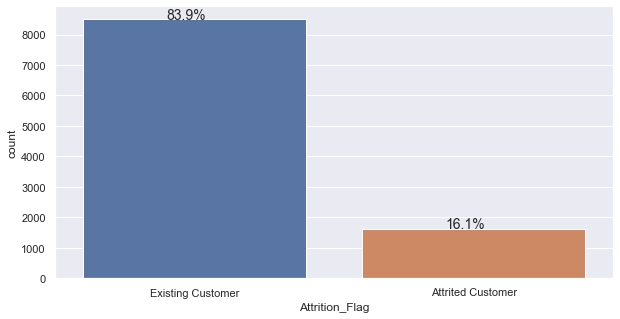

In [28]:
perc_on_bar(data["Attrition_Flag"])

* About 83.9 % are existing customers

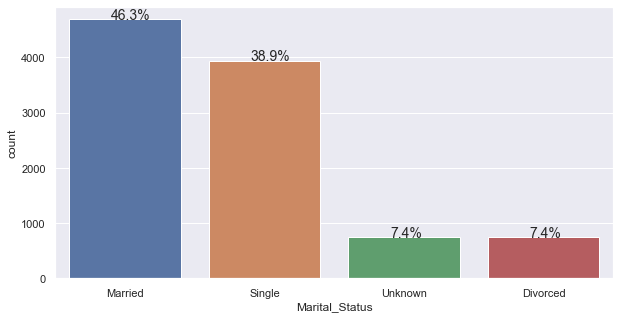

In [29]:
perc_on_bar(data["Marital_Status"])

* About 46.3% of the account holders are married and about 14.8 are either divorced or unknown

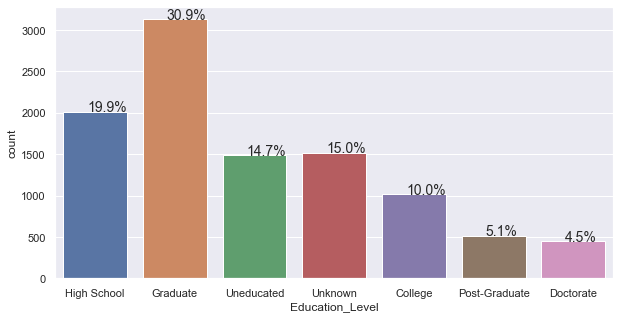

In [30]:
perc_on_bar(data["Education_Level"])

* About 30.9% are graduates and 14.7% have no education

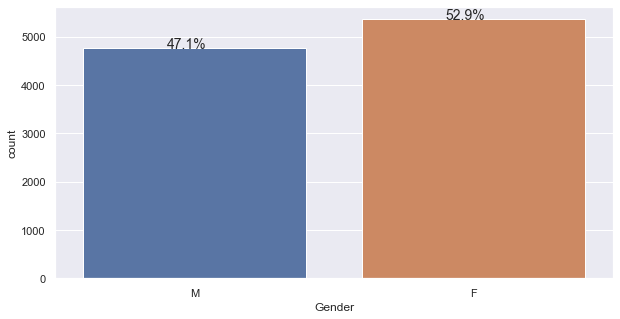

In [31]:
perc_on_bar(data["Gender"])

* About 53% are female and 47 are males

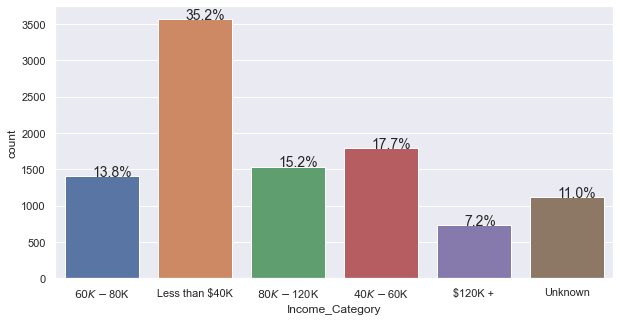

In [32]:
perc_on_bar(data["Income_Category"])

* About 35.2% make 40k or less a year
* About 17% make 40k to 60k a year
* About 7.2% make 120k or more.
* The unknowen could mean the customer didnt want to share that info with us.

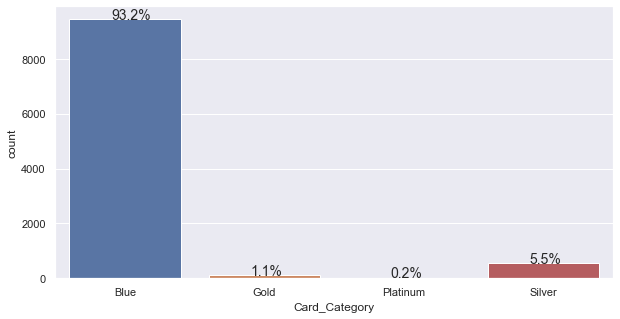

In [126]:
perc_on_bar(data["Card_Category"])

* About 93.2% are choosing the blue card

### Bivariate Analysis

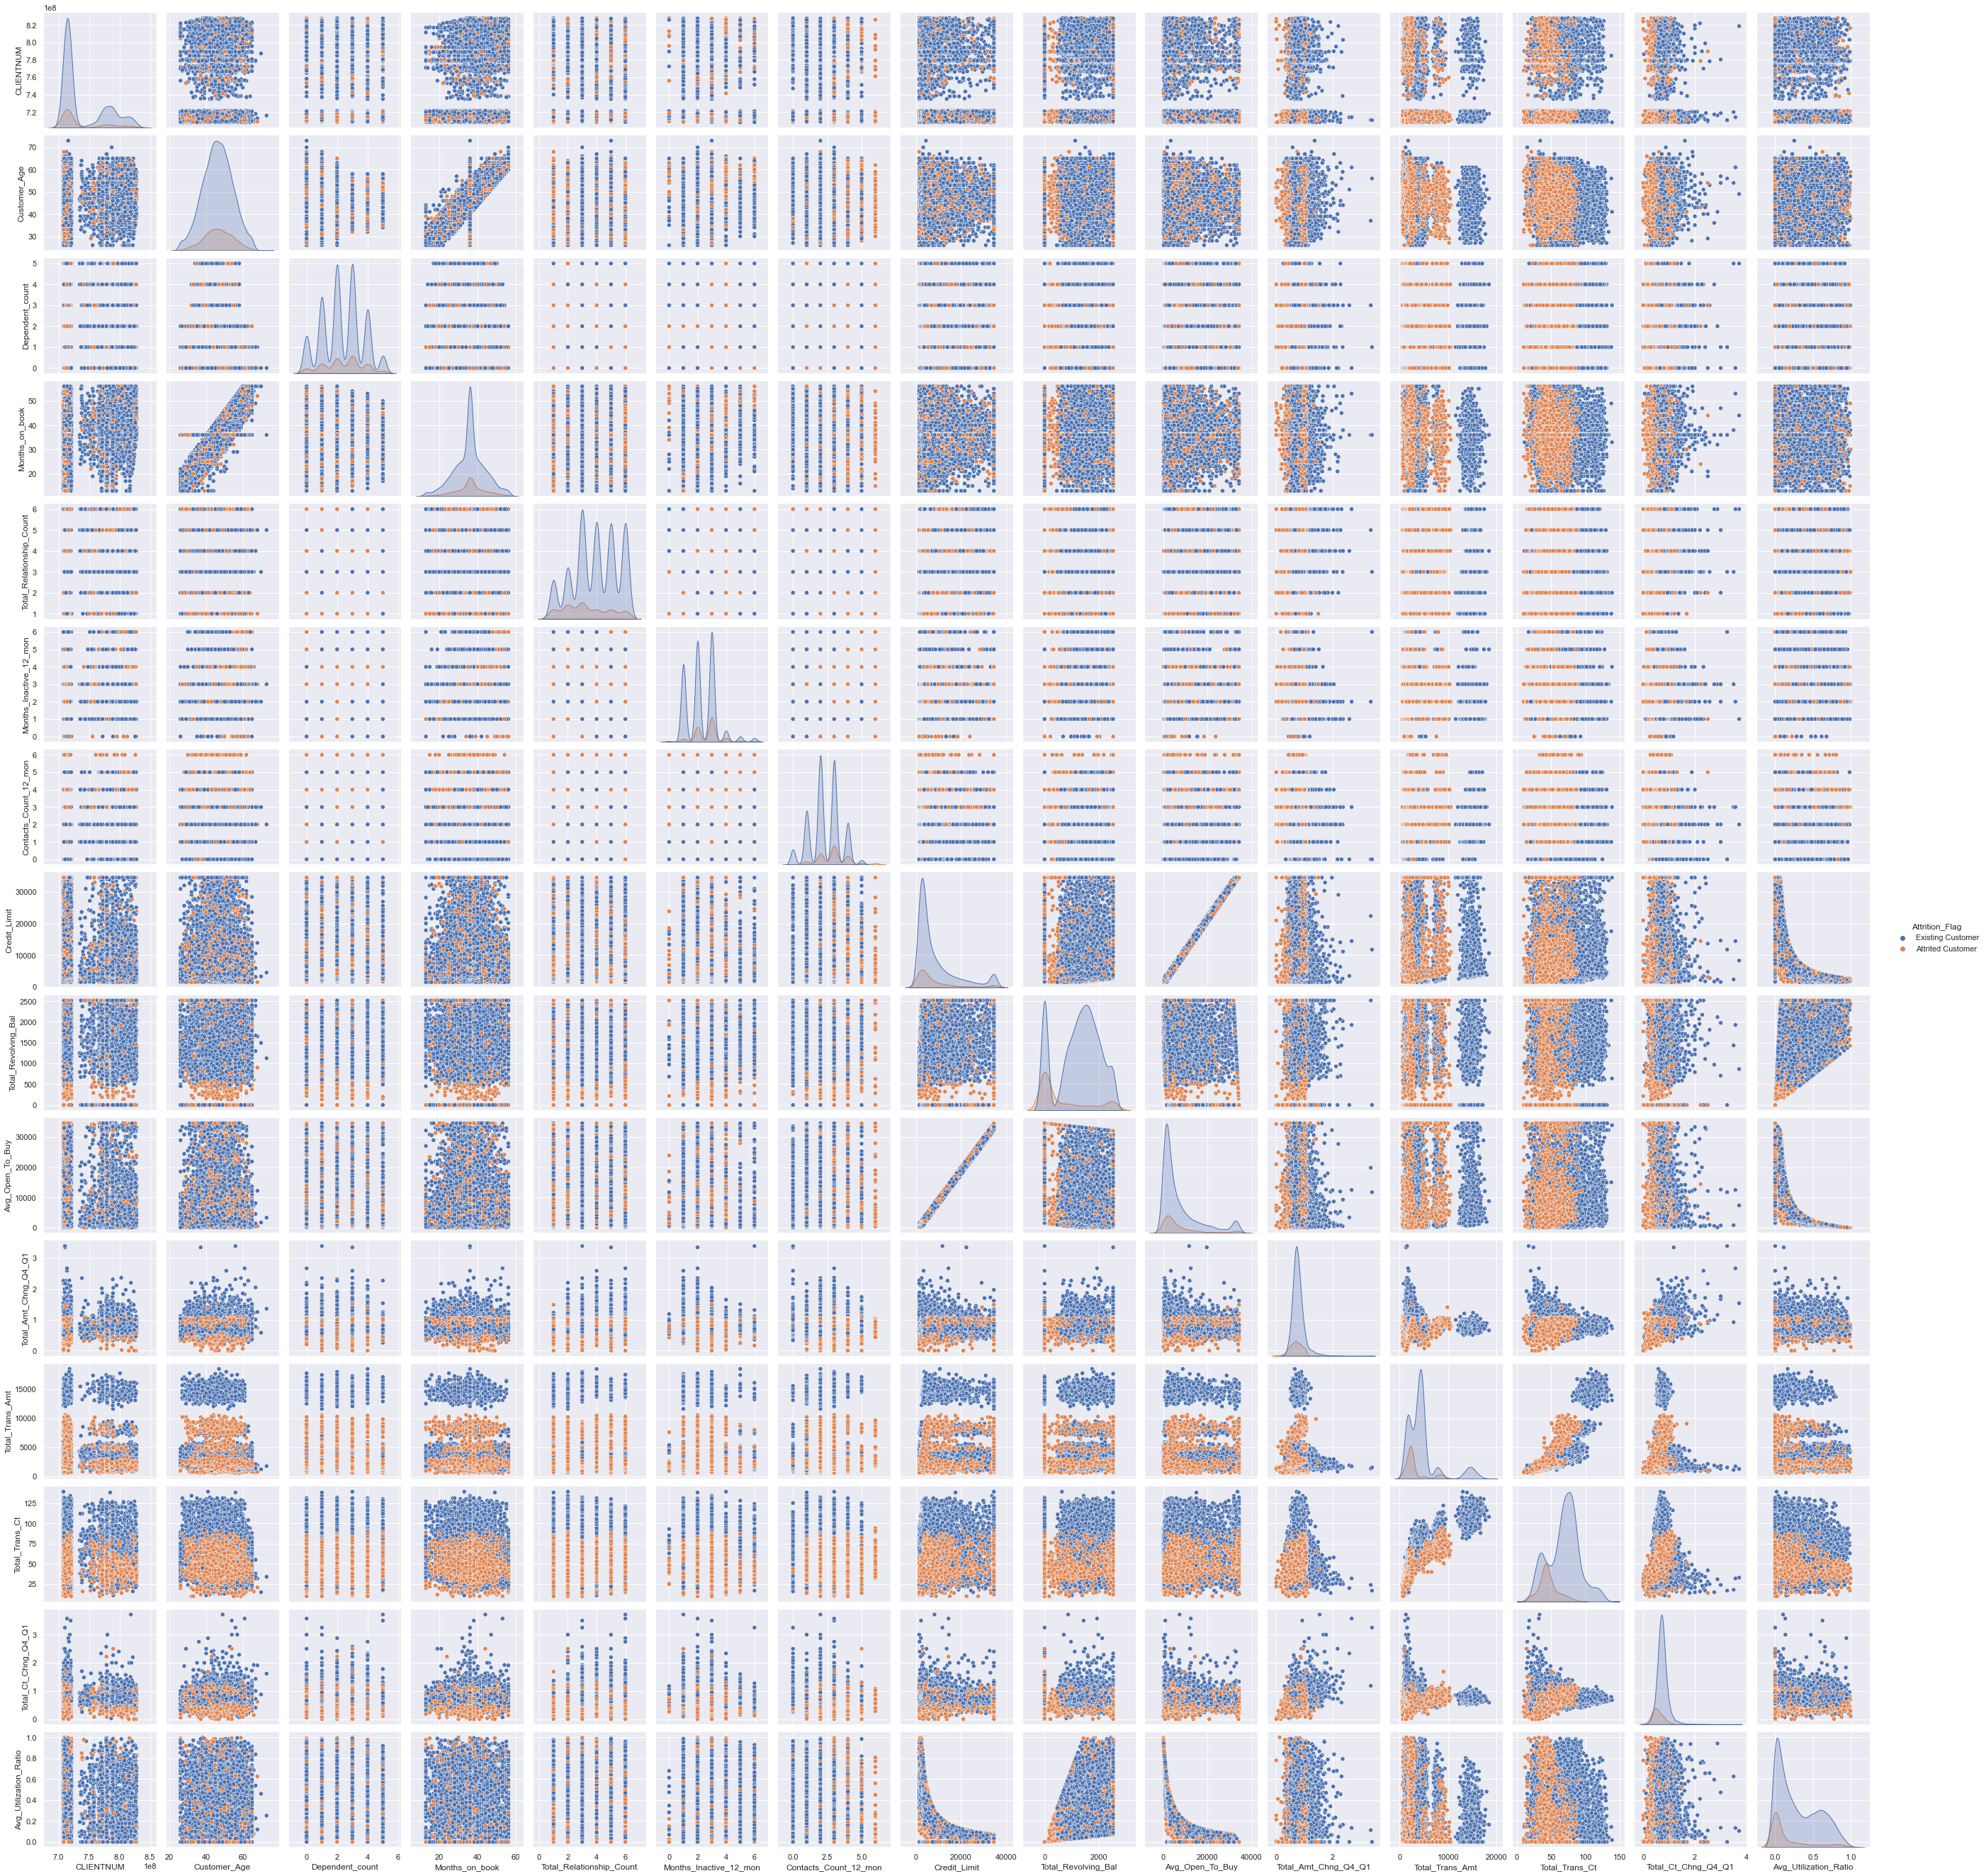

In [34]:
sns.pairplot(data, hue="Attrition_Flag")

* There are overlaps i.e. no clear distinction in the distribution of variables for customers that renounce their credit cards
* Let's explore this further with the help of other plots.

<AxesSubplot:xlabel='Marital_Status', ylabel='Total_Trans_Amt'>

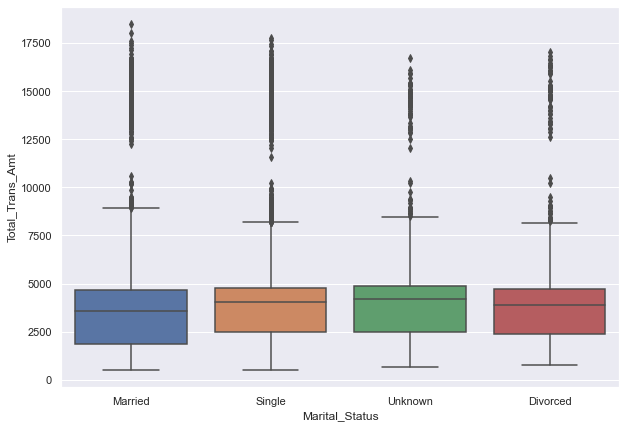

In [35]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Total_Trans_Amt", x="Marital_Status", data=data, orient="vertical")

* This show that divorced customer have a slightly low total trans count then married ones

<AxesSubplot:xlabel='Card_Category', ylabel='Credit_Limit'>

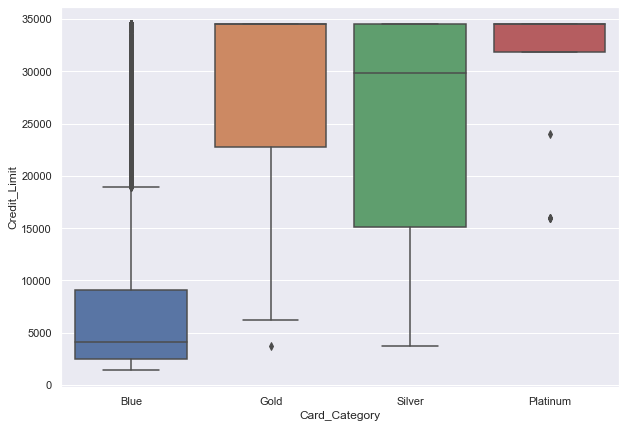

In [36]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Credit_Limit", x="Card_Category", data=data, orient="vertical")

* Thier is a clear even range of customers with low and high cedit limit for the blue card
* For the Platinum card thire is only customers with high credit limits with a few exceptions

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

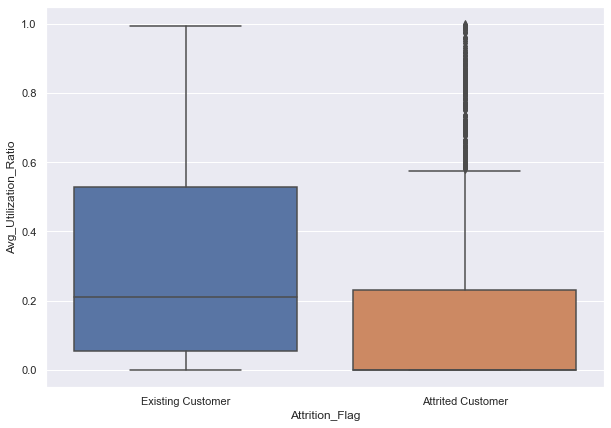

In [37]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Avg_Utilization_Ratio", x="Attrition_Flag", data=data, orient="vertical")

* This shows that most of the existing customers have a high chance of spending their credit  vs attried

In [38]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, data["Attrition_Flag"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["Attrition_Flag"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
College                        154                859   1013
Doctorate                       95                356    451
Graduate                       487               2641   3128
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Unknown                        256               1263   1519
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


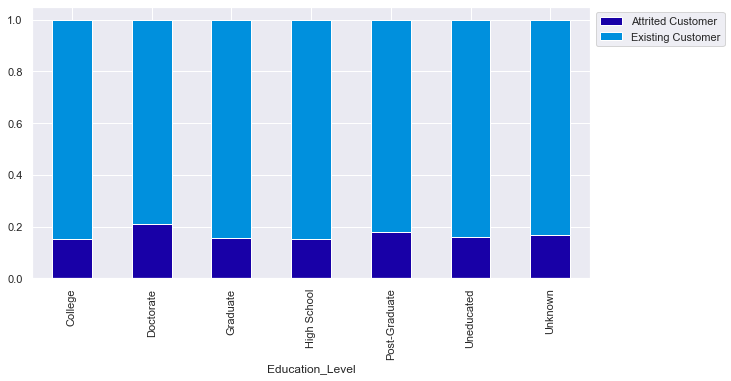

In [39]:
stacked_plot(data["Education_Level"])

* Doctorate and Post-Graduate have a lower count of attrited customers
* Graduate and High School have a high count of existing customers  

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


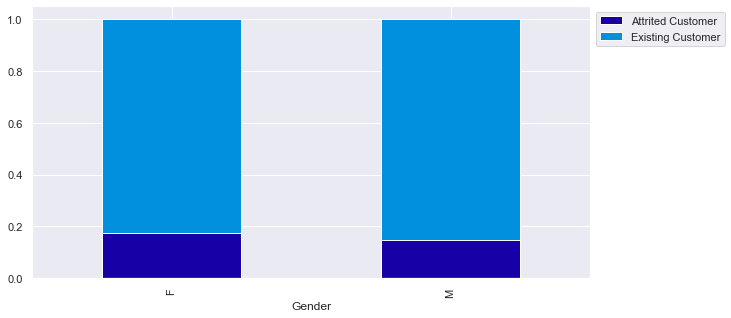

In [40]:
stacked_plot(data["Gender"])

* Fermale have a higher attired count vs male as well as Existing Customers

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


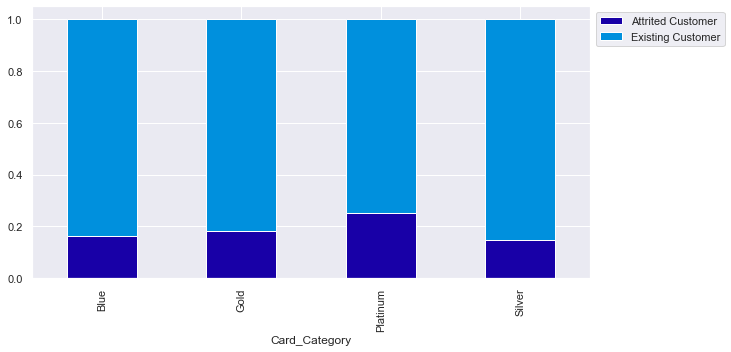

In [41]:
stacked_plot(data["Card_Category"])

* Blue card have a higher existing customer count where as platinum is at the bottom                        

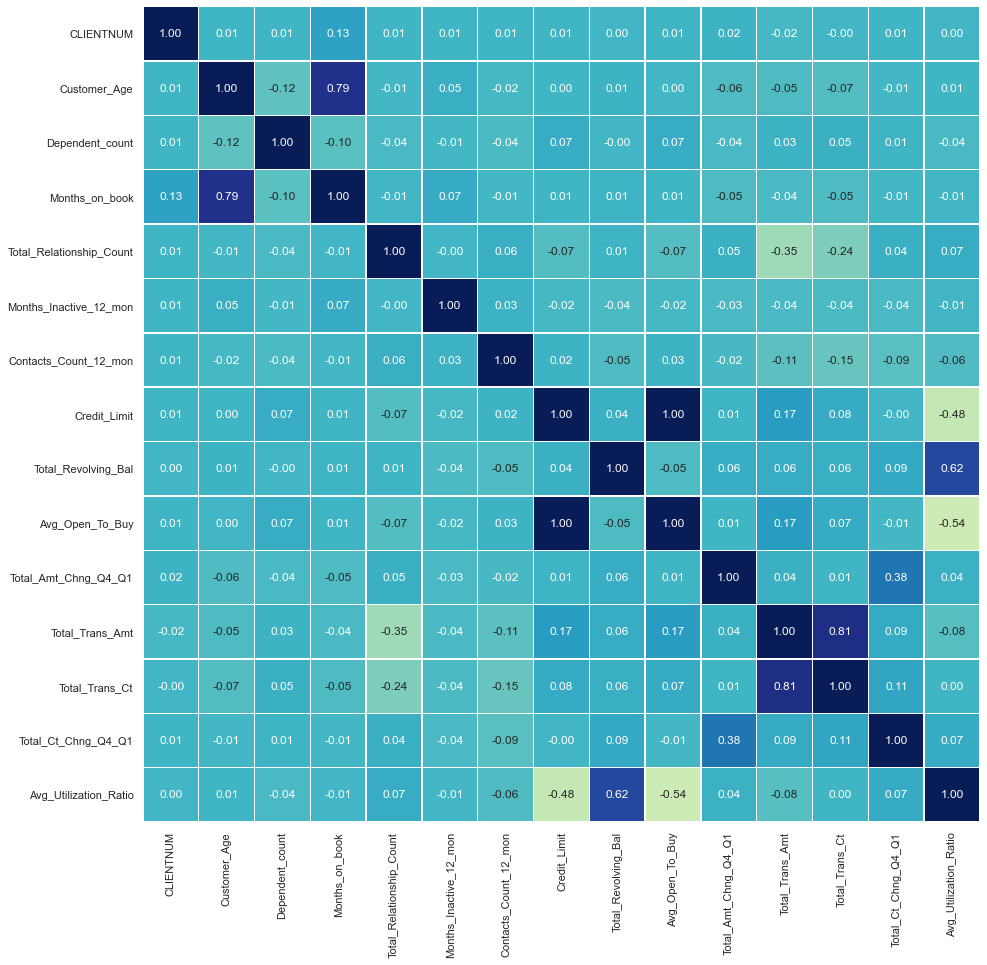

In [42]:
sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(
    data.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

-  Credit_Limit and Avg_Open_To_Buy have a positive correlation which makes sense as customers might have not used the credit amount or the credit is high
- Total_Trans_Ct and Total_Trans_Amt have a positive correlation which makes sense as becuse they almost mean the same thing beside that one counts the value in currency where as the other accounts the total transaction.
- Other variables have no significant correlation between them

## <a id = "link3"></a> Split the dataset/Data Pre-processing

**Processing data**



In [43]:
data.drop(columns=["CLIENTNUM","Months_on_book","Total_Trans_Ct","Avg_Open_To_Buy","Total_Revolving_Bal"], inplace=True)

In [44]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [45]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Total_Relationship_Count  10127 non-null  int64   
 9   Months_Inactive_12_mon    10127 non-null  int64   
 10  Contacts_Count_12_mon     10127 non-null  int64   
 11  Credit_Limit              10127 non-null  float64 
 12  Total_Amt_Chng_Q4_Q1      10127 non-null  float64 
 13  Total_Trans_Amt           10127 non-null  int6

* No missing value but thier are many zero values

In [47]:
attrition_Flag = {'Existing Customer':1, 'Attrited Customer':0}
data['Attrition_Flag']=data['Attrition_Flag'].map(attrition_Flag)


* We asign the positive and negitive labels to the defualt varible

##### Splitting the data into train and test sets¶


In [48]:
X = data.drop('Attrition_Flag',axis=1)
y = data['Attrition_Flag']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=85, shuffle=True
)
print(X_train.shape, X_test.shape)

(7088, 15) (3039, 15)


**One Hot Encoding**

In [50]:
col_dummy=['Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']


In [51]:
X_train=pd.get_dummies(X_train, columns=col_dummy, drop_first=True)
X_test=pd.get_dummies(X_test, columns=col_dummy, drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 28) (3039, 28)


In [52]:
data.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0              1            45      M                3     High School   
1              1            49      F                5        Graduate   
2              1            51      M                3        Graduate   
3              1            40      F                4     High School   
4              1            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Total_Relationship_Count  \
0        Married     $60K - $80K          Blue                         5   
1         Single  Less than $40K          Blue                         6   
2        Married    $80K - $120K          Blue                         4   
3        Unknown  Less than $40K          Blue                         3   
4        Married     $60K - $80K          Blue                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144                1.625   
1                 1.541             1291                3.714   
2                 2.594             1887                2.333   
3                 1.405             1171                2.333   
4                 2.175              816                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

* Setting up pipline for all of our models minus the tuned versions

## <a id = "link4"></a> Model building - Logistic Regression, Bagging, RandomForest, GradientBoosting, AdaBoost, Xgboost, Decision_tree

In [53]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "BAG",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("BaggingClassifier", BaggingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold, n_jobs=-1
    )
    results.append(cv_result)
    names.append(name)
   
    print("{}: {}".format(name, cv_result.mean() * 100))
    

LR: 97.46687894147627
RF: 98.8591588516908
BAG: 96.94674471328837
GBM: 98.45657273693863
ADB: 96.87967281175986
XGB: 98.49010165563101
DTREE: 95.25243731611133


* we have really good recall scores
* the three best are RF,GBM, XGB
* the worst model was DTree at 95.25 which is still very good but compared to the rest of our model it falls last

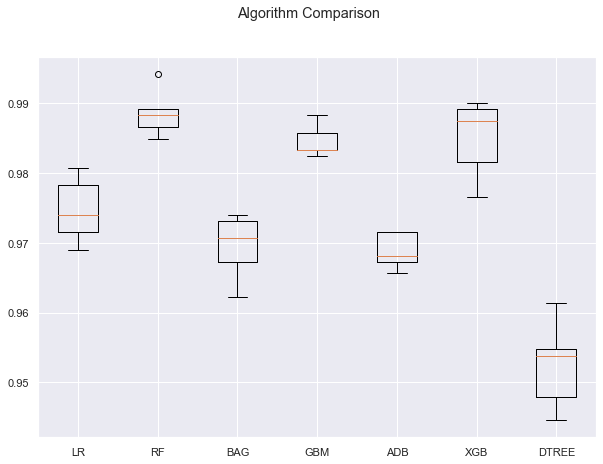

In [54]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- We can see that the decision tree is giving the lowest cross-validated recall followed by ADB
- The boxplot shows that the performance of RandomForest is consistent with just one outlier
- We will tune the best two models Randomforest and xgboost and see if the performance improves and ADB as well

In [55]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model: classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)
    
     #F1 score for model
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
            train_f1,
            test_f1,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print( "Precision on training set : ", metrics.precision_score(y_train, pred_train))
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))
        print("F1 on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1 on test set : ",metrics.f1_score(y_test,pred_test))

    return score_list  # returning the list with train and test scores


In [56]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model: classifier to predict values of X
    y_actual: ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## <a id = "link5"></a> Hyperparameter tuning using grid search

* We will be selecting the top 3 models to tune using Grid Seach
* I choose RF,ADAboost,XGB because two of them are the best models and one is ok but i think i can tune the Hyperparameter​ which is AdaBoost to perform better.

## AdaBoost

In [57]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1), 'adaboostclassifier__learning_rate': 0.1, 'adaboostclassifier__n_estimators': 10} 
Score: 1.0
Wall time: 45.1 s


In [58]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=100,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=100,
                                    random_state=1))])

Accuracy on training set :  0.9841986455981941
Accuracy on test set :  0.9499835472194801
Recall on training set :  0.9929542023150478
Recall on test set :  0.9791256400157542
Precision on training set :  0.988311905159459
Precision on test set :  0.9617021276595744
F1 on training set :  0.9906276150627615
F1 on test set :  0.9703356752537079


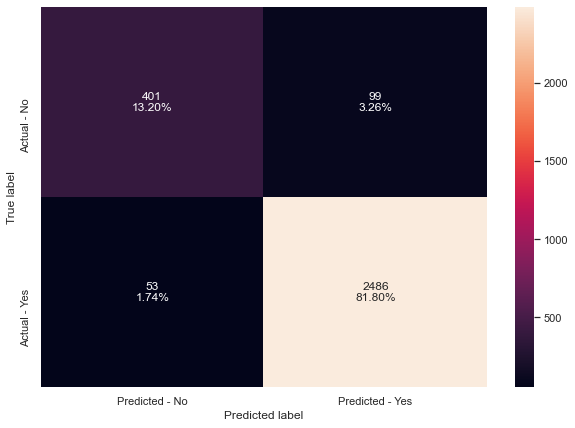

In [59]:

# Calculating different metrics
get_metrics_score(abc_tuned1)

# Creating confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

- The test recall has increased by ~4% as compared to cross-validated recall
- The tuned ADB model is slightly overfitting the training data
- The test recall increased just ~2%  the model is a good at identifying customers who want to renounce their credit cards

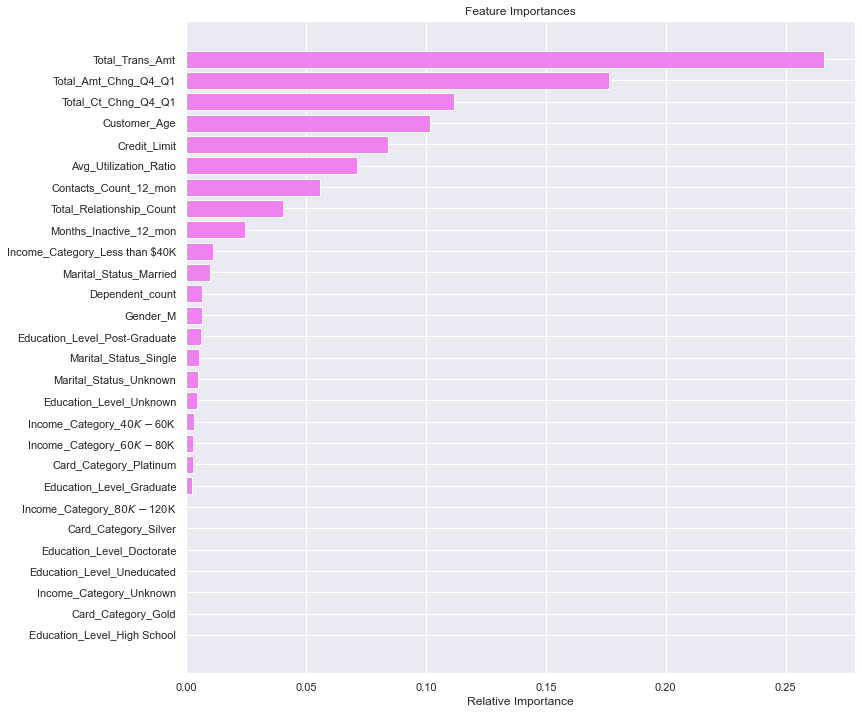

In [111]:
feature_names = X_train.columns
importances = abc_tuned1[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## RandomForest

In [67]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "randomforestclassifier__n_estimators": np.arange(10, 110, 10),
    "randomforestclassifier__max_depth": [3, None],
    "randomforestclassifier__min_samples_split": (2, 11),
    "randomforestclassifier__min_samples_leaf": (1, 11),
    "randomforestclassifier__bootstrap": [True, False],
    "randomforestclassifier__criterion": ["gini", "entropy"]
}
        

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)




Best Parameters:{'randomforestclassifier__bootstrap': False, 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 3, 'randomforestclassifier__min_samples_leaf': 11, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 20} 
Score: 1.0
Wall time: 1min


In [92]:
# Creating new pipeline with best parameters
RF_tuned1 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        random_state=1,
        n_estimators=100,
        max_depth=4,
        min_samples_split=11,
        min_samples_leaf =1,
        bootstrap=False,
        
    ),
)

# Fit the model on training data
RF_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, max_depth=4,
                                        min_samples_split=11,
                                        random_state=1))])

Accuracy on training set :  0.8807844243792325
Accuracy on test set :  0.8749588680487003
Recall on training set :  0.9994967287367891
Recall on test set :  0.9988184324537219
Precision on training set :  0.8761764705882353
Precision on test set :  0.8705801579128046
F1 on training set :  0.9337826189170128
F1 on test set :  0.9303008070432868


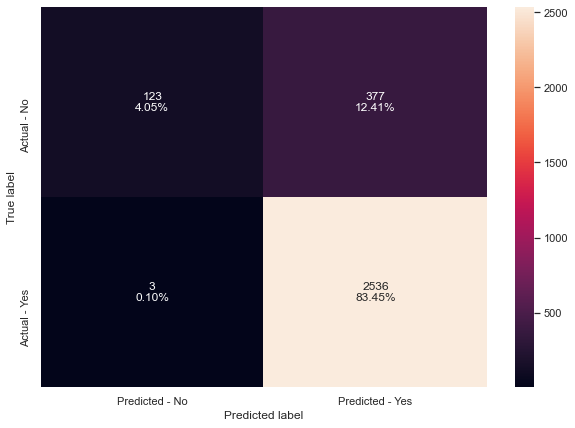

In [93]:
# Calculating different metrics
get_metrics_score(RF_tuned1)

# Creating confusion matrix
make_confusion_matrix(RF_tuned1, y_test)

- The test recall has increased by ~2% as compared to cross-validated recall
- The tuned RF model is slightly overfitting the training data
- The test recall  increased just ~2%  the model is a good  at identifying customers who want to renounce their credit cards

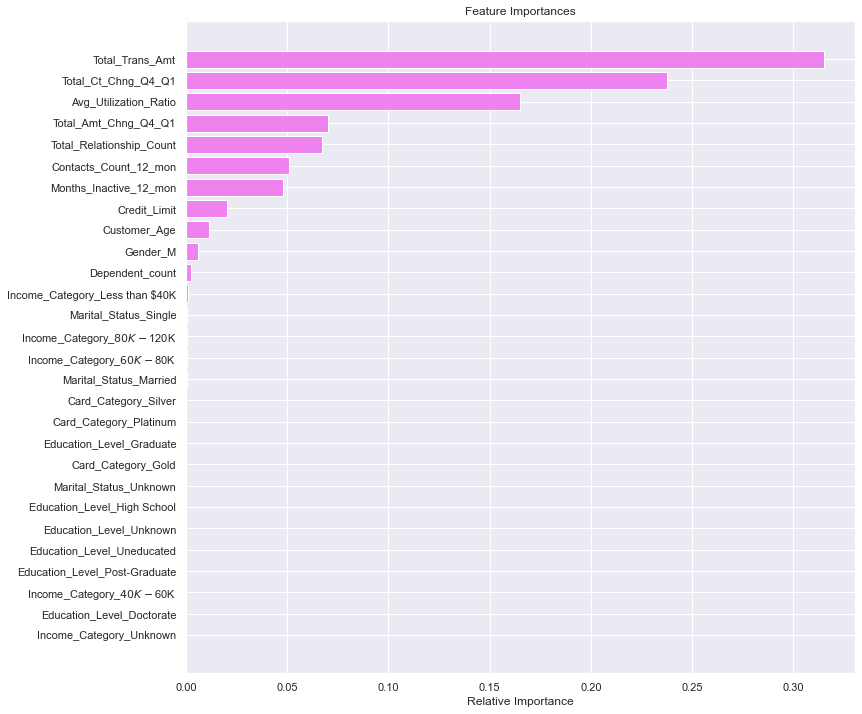

In [112]:
feature_names = X_train.columns
importances = RF_tuned1[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## XGBoost

In [94]:
%%time 

# Creating pipeline
pipe = make_pipeline(
    StandardScaler(), XGBClassifier(random_state=1, eval_metric="logloss")
)

# Parameter grid to pass in GridSearchCV
param_grid = {
    "xgbclassifier__n_estimators": np.arange(50, 300, 50),
    "xgbclassifier__scale_pos_weight": [0, 1, 2, 5, 10],
    "xgbclassifier__learning_rate": [0.01, 0.1, 0.2, 0.05],
    "xgbclassifier__gamma": [0, 1, 3, 5],
    "xgbclassifier__subsample": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)


print(
    "Best parameters are {} with CV score={}:".format(
        grid_cv.best_params_, grid_cv.best_score_
    )
)

Best parameters are {'xgbclassifier__gamma': 1, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__n_estimators': 150, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 1} with CV score=0.9984903548102185:
Wall time: 24min 35s


In [95]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=50,
        scale_pos_weight=10,
        subsample=0.9,
        learning_rate=0.01,
        gamma=3,
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

[20:52:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=3, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=12, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.8816309255079007
Accuracy on test set :  0.8726554787759131
Recall on training set :  0.999832242912263
Recall on test set :  0.9980307207562032
Precision on training set :  0.8767284495439835
Precision on test set :  0.8689986282578875
F1 on training set :  0.9342424954933772
F1 on test set :  0.9290559120073328


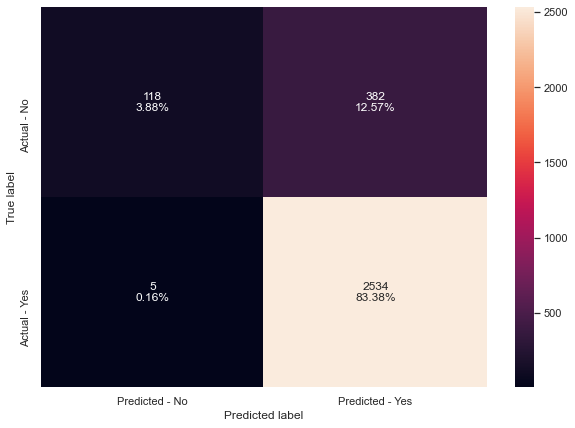

In [96]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

- The test recall has increased by ~2% as compared to cross-validated recall
- The tuned XGB model is slightly overfitting the training data
- The test recall increased just ~2%  the model is a good at identifying customers who want to renounce their credit cards

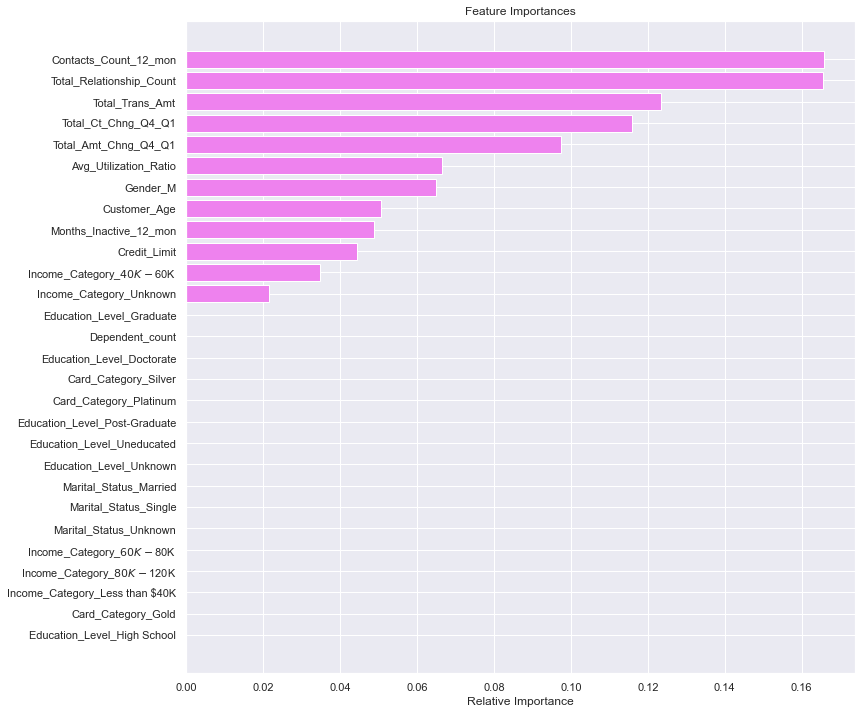

In [114]:
feature_names = X_train.columns
importances = xgb_tuned1[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## <a id = "link6"></a> Hyperparameter tuning using random search

## AdaBoost

In [97]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
abc_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5,n_jobs=-1, random_state=1)

#Fitting parameters in RandomizedSearchCV
abc_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(abc_tuned2.best_params_,abc_tuned2.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 50, 'adaboostclassifier__learning_rate': 0.01, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=1.0:
Wall time: 15.7 s


In [98]:
# Creating new pipeline with best parameters
abc_tuned2 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=100,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=100,
                                    random_state=1))])

Accuracy on training set :  0.9841986455981941
Accuracy on test set :  0.9499835472194801
Recall on training set :  0.9929542023150478
Recall on test set :  0.9791256400157542
Precision on training set :  0.988311905159459
Precision on test set :  0.9617021276595744
F1 on training set :  0.9906276150627615
F1 on test set :  0.9703356752537079


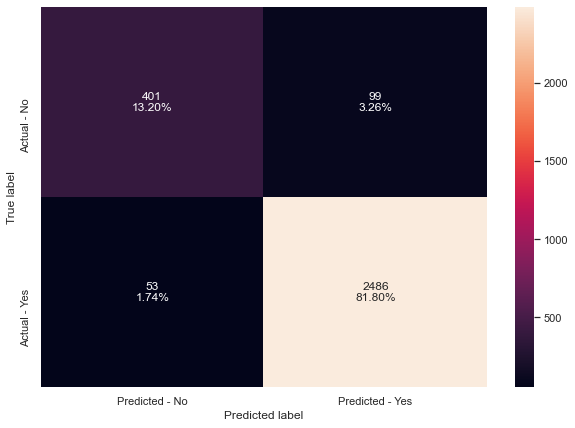

In [99]:
# Calculating different metrics
get_metrics_score(abc_tuned2)

# Creating confusion matrix
make_confusion_matrix(abc_tuned2, y_test)

- The test recall has increased by ~4% as compared to cross-validated recall
- The tuned ADB model is slightly overfitting the training data
- The test recall increased just ~2%  the model is a good at identifying customers who want to renounce their credit cards

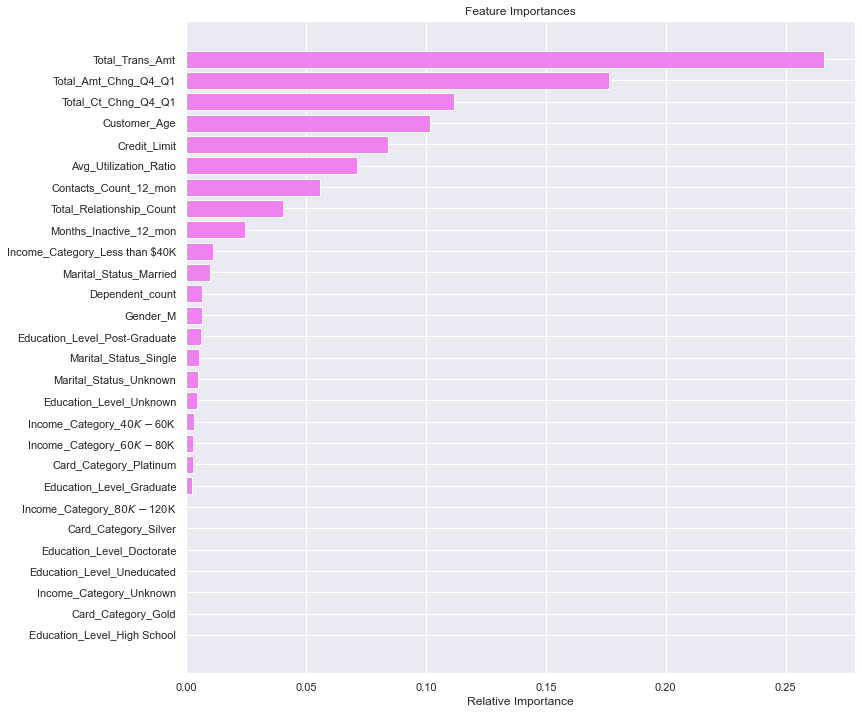

In [115]:
feature_names = X_train.columns
importances = abc_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## RandomForest

In [100]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "randomforestclassifier__n_estimators": np.arange(10, 110, 10),
    "randomforestclassifier__max_depth": [3, None],
    "randomforestclassifier__min_samples_split": (2, 11),
    "randomforestclassifier__min_samples_leaf": (1, 11),
    "randomforestclassifier__bootstrap": [True, False],
    "randomforestclassifier__criterion": ["gini", "entropy"]
}
        
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
RF_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5,n_jobs=-1, random_state=1)

#Fitting parameters in RandomizedSearchCV
RF_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(RF_tuned2.best_params_,RF_tuned2.best_score_))



Best parameters are {'randomforestclassifier__n_estimators': 80, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_depth': 3, 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__bootstrap': False} with CV score=0.9998323554065381:
Wall time: 9.28 s


In [101]:
# Creating new pipeline with best parameters
RF_tuned2 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        random_state=1,
        n_estimators=100,
        max_depth=4,
        min_samples_split=11,
        min_samples_leaf =1,
        bootstrap=False,
        
    ),
)

# Fit the model on training data
RF_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, max_depth=4,
                                        min_samples_split=11,
                                        random_state=1))])

Accuracy on training set :  0.8807844243792325
Accuracy on test set :  0.8749588680487003
Recall on training set :  0.9994967287367891
Recall on test set :  0.9988184324537219
Precision on training set :  0.8761764705882353
Precision on test set :  0.8705801579128046
F1 on training set :  0.9337826189170128
F1 on test set :  0.9303008070432868


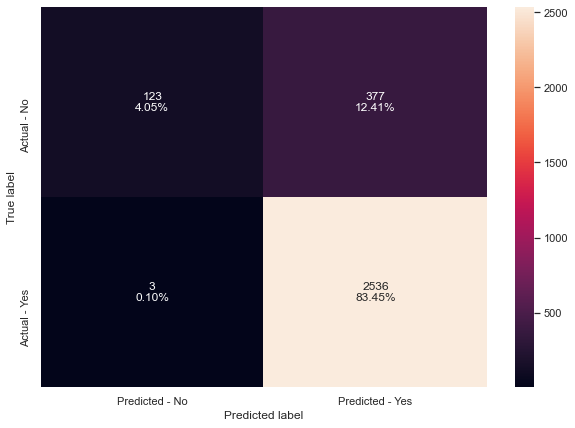

In [102]:
# Calculating different metrics
get_metrics_score(RF_tuned2)

# Creating confusion matrix
make_confusion_matrix(RF_tuned2, y_test)

- The test recall has increased by ~2% as compared to cross-validated recall
- The tuned RF model is slightly overfitting the training data
- The test recall increased just ~2%  the model is a good at identifying customers who want to renounce their credit cards

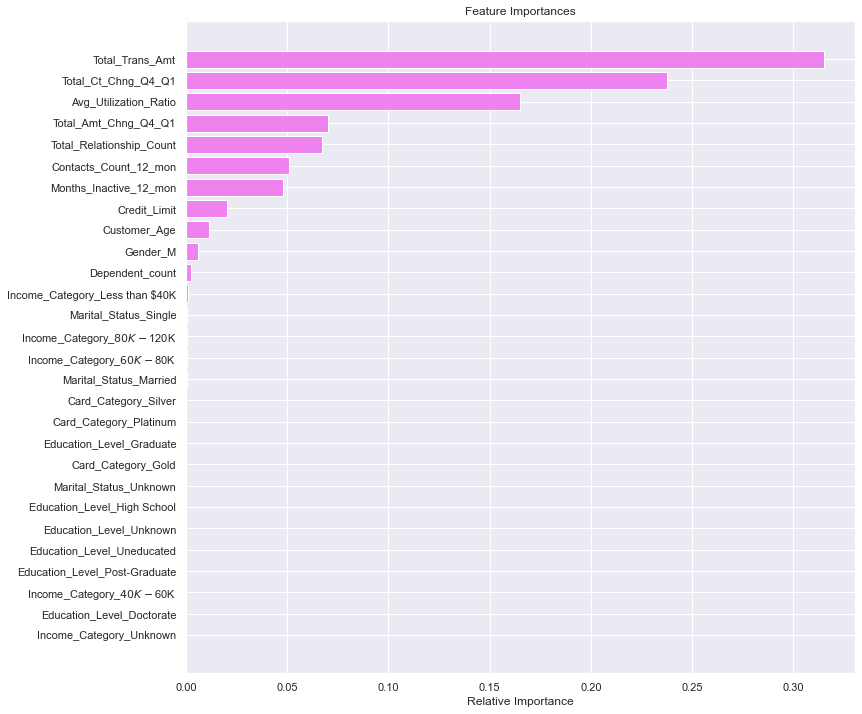

In [116]:
feature_names = X_train.columns
importances = RF_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## XGBoost

In [103]:
%%time
#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1))

#Parameter grid to pass in RandomizedSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5,n_jobs=-1, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

[20:53:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters are {'xgbclassifier__subsample': 0.9, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__gamma': 1} with CV score=0.9976517099185968:
Wall time: 43.9 s


In [104]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=20,
                scale_pos_weight=10,
                learning_rate=0.01,
                gamma=1,
                subsample=0.9,
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

[20:53:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=1, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=20,
                               n_jobs=12, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.8758465011286681
Accuracy on test set :  0.8706811451135242
Recall on training set :  0.999664485824526
Recall on test set :  0.9980307207562032
Precision on training set :  0.8715811028228755
Precision on test set :  0.867214236824093
F1 on training set :  0.9312392561337708
F1 on test set :  0.9280351583958981


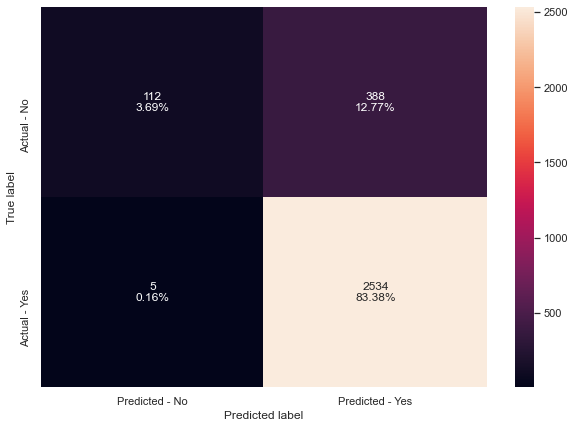

In [105]:
# Calculating different metrics
get_metrics_score(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

- The test recall has increased by ~4% as compared to cross-validated recall
- The tuned XGB model is slightly overfitting the training data
- The test recall increased just ~2%  the model is a good at identifying customers who want to renounce their credit cards

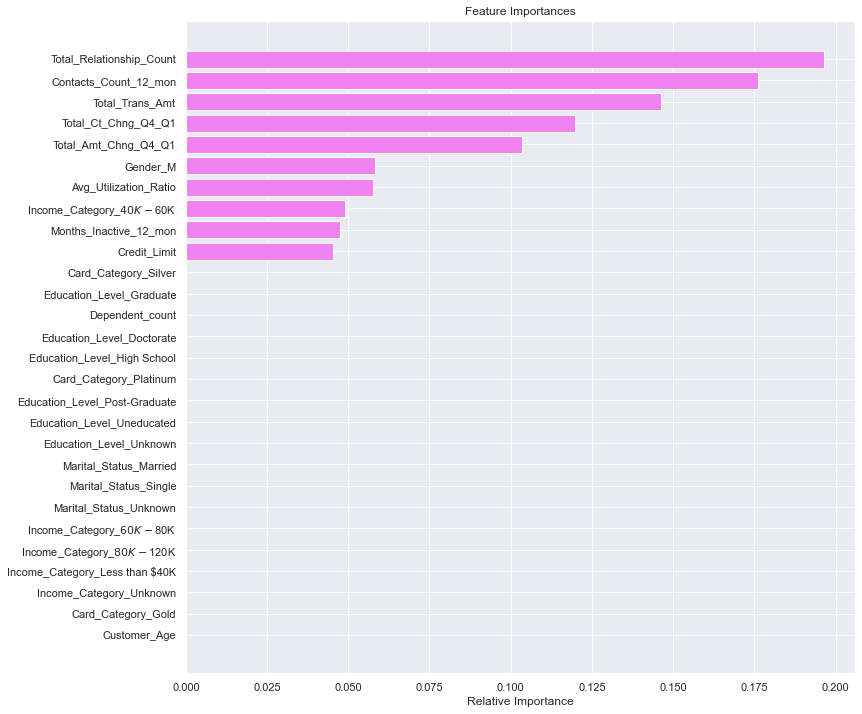

In [117]:
feature_names = X_train.columns
importances = xgb_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## <a id = "link7"></a> Model Performances 

In [106]:
# defining list of models
models = [abc_tuned1, abc_tuned2, xgb_tuned1, xgb_tuned2,RF_tuned1,RF_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [108]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Adaboost with GridSearchCV",
            "Adaboost with RandomizedSearchCV",
            "XGBoost with GridSearchCV",
            "XGBoost with RandomizedSearchCV",
             "RandomForest with GridSearchCV",
            "RandomForest with RandomizedSearchCV",
    
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
4        RandomForest with GridSearchCV        0.880784       0.874959   
5  RandomForest with RandomizedSearchCV        0.880784       0.874959   
2             XGBoost with GridSearchCV        0.881631       0.872655   
3       XGBoost with RandomizedSearchCV        0.875847       0.870681   
0            Adaboost with GridSearchCV        0.984199       0.949984   
1      Adaboost with RandomizedSearchCV        0.984199       0.949984   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  Train_F1  \
4      0.999497     0.998818         0.876176        0.870580  0.933783   
5      0.999497     0.998818         0.876176        0.870580  0.933783   
2      0.999832     0.998031         0.876728        0.868999  0.934242   
3      0.999664     0.998031         0.871581        0.867214  0.931239   
0      0.992954     0.979126         0.988312        0.961702  0.990628   
1      0.992954     0.979126         0.988312        0.961702  0.990628   

    Test_F1  
4  0.930301  
5  0.930301  
2  0.929056  
3  0.928035  
0  0.970336  
1  0.970336

- We can see that RandomForest  is giving a similar performance with GridSearchCV and RandomizedSearchCV with a test recall of ~0.99
- Let's see the feature importance from the RandomForest  model tuned with GridSearchCV 

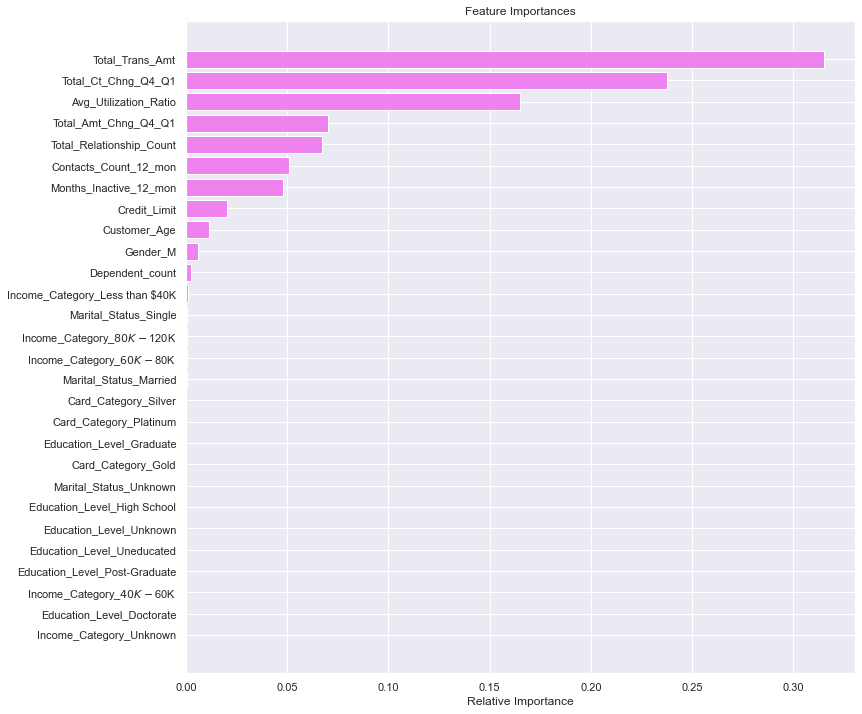

In [110]:
feature_names = X_train.columns
importances = RF_tuned1[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total trans amt and total t chng q4 to q1 are the two most important variables which make sense as these variable play an important role in customers who want to renounce their credit cards.

## <a id = "link8"></a> Business Recommendations/Actionable Insights

* On the basis of our analysis, we can say that the total trans amt is vary important. For example, If someone is not using thier card then they will have a lower total trans amt and more likely to renounce their credit cards. because they are not using them. The best way to fix this by addind a points system that rewards a customer for using thier card per a transaction. Now the one flaw i see with this data is that it only goes back 12 months which is not enough data to get the best perdictions because if that year was anything like 2020 then that data is not very accurate. 

These are the main feature we can use to decide if the customer will renounce their credit cards:

      
     1) Total_Trans_Amt          
     2) Total_Ct_Chng_Q4_Q1       
     3) Avg_Utilization_Ratio        
     4) Total_Relationship_Count             
     5) Total_Amt_Chng_Q4_Q1    
       
       
 


* The Company can also provide offers for customer to upgrade thier cards also using points to get more customers on the Gold,    Platinum, Silver 

* Once the desired performance is achieved from the model, the company can use it to identify which customer will renounce their credit cards. This would help to reduce the cost and increase the efficiency of the process.